<a href="https://colab.research.google.com/github/Adrestand/NSU/blob/main/Lab_Work_Itog_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics

In [ ]:
# Загрузка датасета Wine
wine = fetch_ucirepo(id=109)
data = wine.data.features
data['class'] = wine.data.targets
wine.data.features

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [ ]:
#первые 5 строк
data.head()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [ ]:
#Последние 5 строчек
data.tail(5)

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840,3
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560,3


In [ ]:
print(data.dtypes)

Alcohol                         float64
Malicacid                       float64
Ash                             float64
Alcalinity_of_ash               float64
Magnesium                         int64
Total_phenols                   float64
Flavanoids                      float64
Nonflavanoid_phenols            float64
Proanthocyanins                 float64
Color_intensity                 float64
Hue                             float64
0D280_0D315_of_diluted_wines    float64
Proline                           int64
class                             int64
dtype: object


In [ ]:
data.info

<bound method DataFrame.info of      Alcohol  Malicacid   Ash  Alcalinity_of_ash  Magnesium  Total_phenols  \
0      14.23       1.71  2.43               15.6        127           2.80   
1      13.20       1.78  2.14               11.2        100           2.65   
2      13.16       2.36  2.67               18.6        101           2.80   
3      14.37       1.95  2.50               16.8        113           3.85   
4      13.24       2.59  2.87               21.0        118           2.80   
..       ...        ...   ...                ...        ...            ...   
173    13.71       5.65  2.45               20.5         95           1.68   
174    13.40       3.91  2.48               23.0        102           1.80   
175    13.27       4.28  2.26               20.0        120           1.59   
176    13.17       2.59  2.37               20.0        120           1.65   
177    14.13       4.10  2.74               24.5         96           2.05   

     Flavanoids  Nonflavanoid_p

In [ ]:
data.describe()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [ ]:
data['class'].value_counts().keys

<bound method Series.keys of 2    71
1    59
3    48
Name: class, dtype: int64>

In [ ]:
class_counts = data['class'].value_counts()
values = list(class_counts)
colors = ['green', 'red', 'blue']
labels = ['Группа ' + str(i) for i in class_counts.index]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, opacity=0.8)])
fig.update_traces(textinfo='percent+label', marker=dict(line=dict(color='#000000', width=2), colors=colors))
fig.update_layout(title_text='Частотная характеристика классов', title_x=0.5, title_font=dict(size=28))
fig.show()

array([[<Axes: title={'center': 'Alcohol'}>,
        <Axes: title={'center': 'Malicacid'}>,
        <Axes: title={'center': 'Ash'}>,
        <Axes: title={'center': 'Alcalinity_of_ash'}>],
       [<Axes: title={'center': 'Magnesium'}>,
        <Axes: title={'center': 'Total_phenols'}>,
        <Axes: title={'center': 'Flavanoids'}>,
        <Axes: title={'center': 'Nonflavanoid_phenols'}>],
       [<Axes: title={'center': 'Proanthocyanins'}>,
        <Axes: title={'center': 'Color_intensity'}>,
        <Axes: title={'center': 'Hue'}>,
        <Axes: title={'center': '0D280_0D315_of_diluted_wines'}>],
       [<Axes: title={'center': 'Proline'}>,
        <Axes: title={'center': 'class'}>, <Axes: >, <Axes: >]],
      dtype=object)

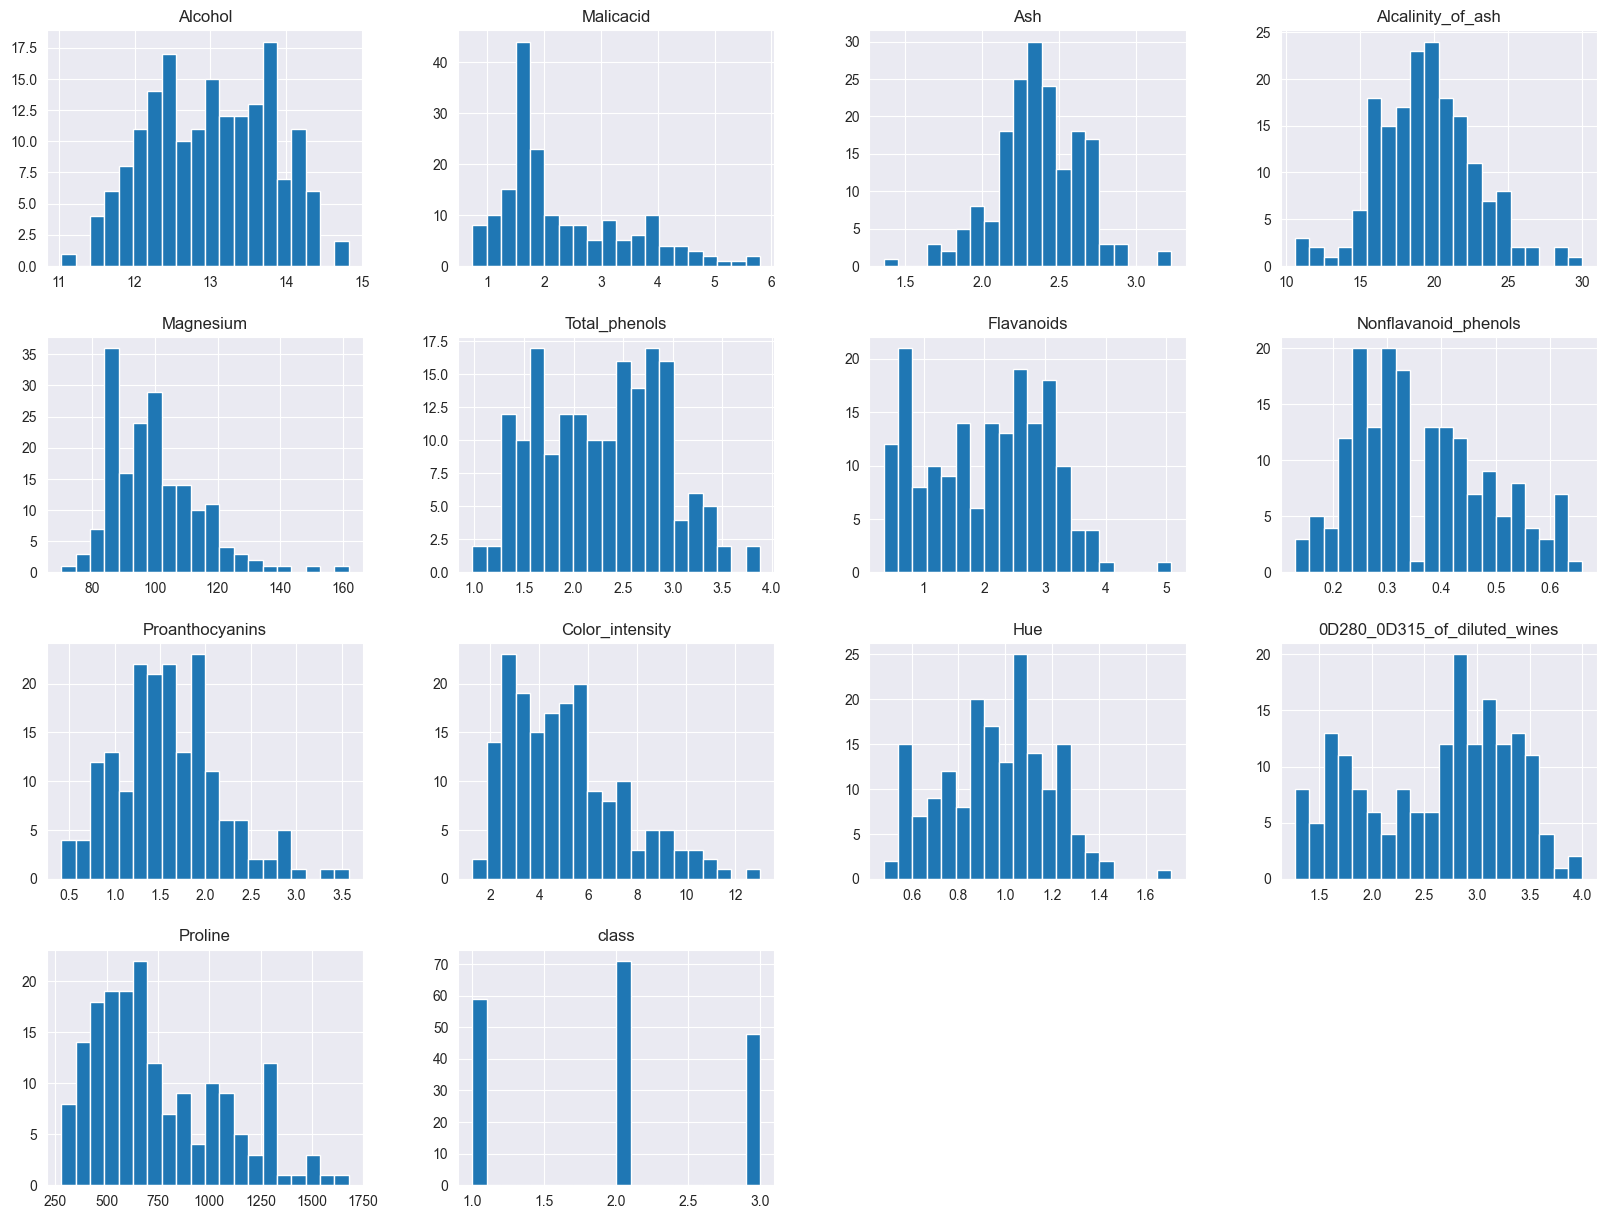

In [ ]:
data.hist(bins=20, figsize=(20, 15))

In [ ]:
from scipy.stats import kstest

# Проход по всем столбцам данных
for column in data.columns:
    # Проверка на нормальность распределения с помощью критерия Колмогорова-Смирнова
    kstest_result = kstest(data[column], 'norm')

    # Вывод результата
    if kstest_result.pvalue > 0.05:
        print(f"{column} - Нормальное распределение")
    else:
        print(f"{column} - Ненормальное распределение")

Alcohol - Ненормальное распределение
Malicacid - Ненормальное распределение
Ash - Ненормальное распределение
Alcalinity_of_ash - Ненормальное распределение
Magnesium - Ненормальное распределение
Total_phenols - Ненормальное распределение
Flavanoids - Ненормальное распределение
Nonflavanoid_phenols - Ненормальное распределение
Proanthocyanins - Ненормальное распределение
Color_intensity - Ненормальное распределение
Hue - Ненормальное распределение
0D280_0D315_of_diluted_wines - Ненормальное распределение
Proline - Ненормальное распределение
class - Ненормальное распределение


In [ ]:
#Данные имеют ненормальный характер распределения. Корреляцию будем проводить с помощью метода Спирмена.

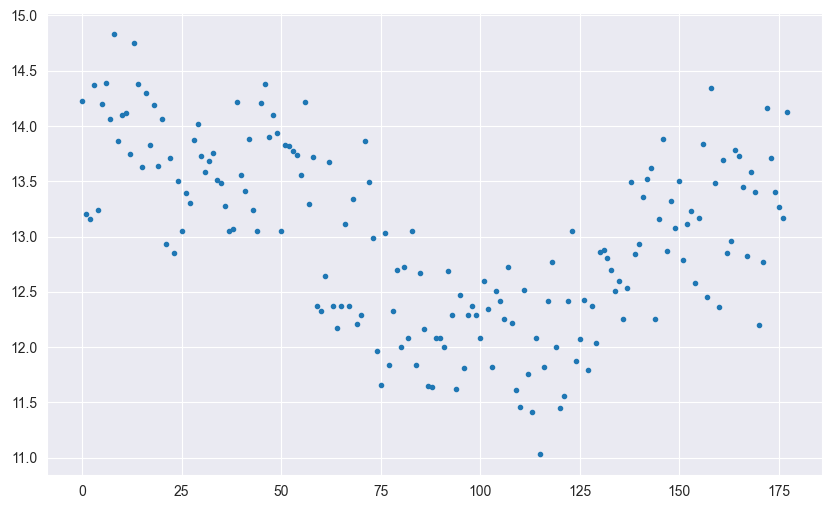

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x=range(len(data)), y=data['Alcohol'], label='Содержание алкоголя', marker='.')

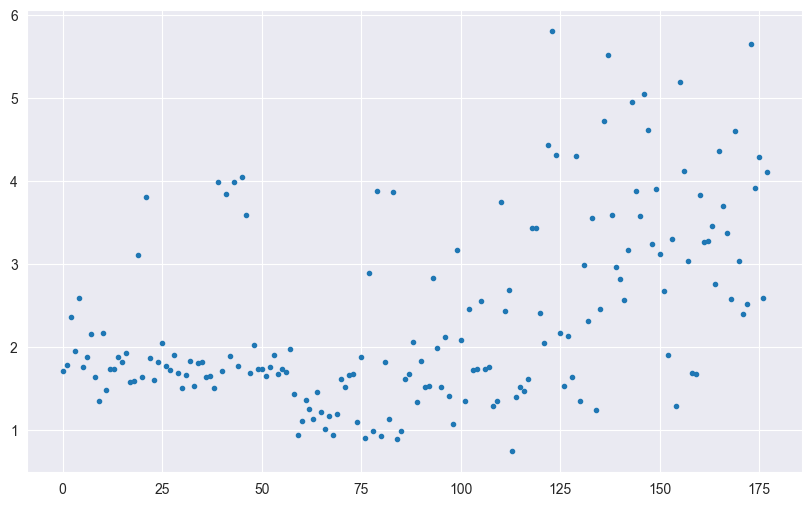

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x=range(len(data)), y=data['Malicacid'], label='Содержание яблочной кислоты', marker='.')

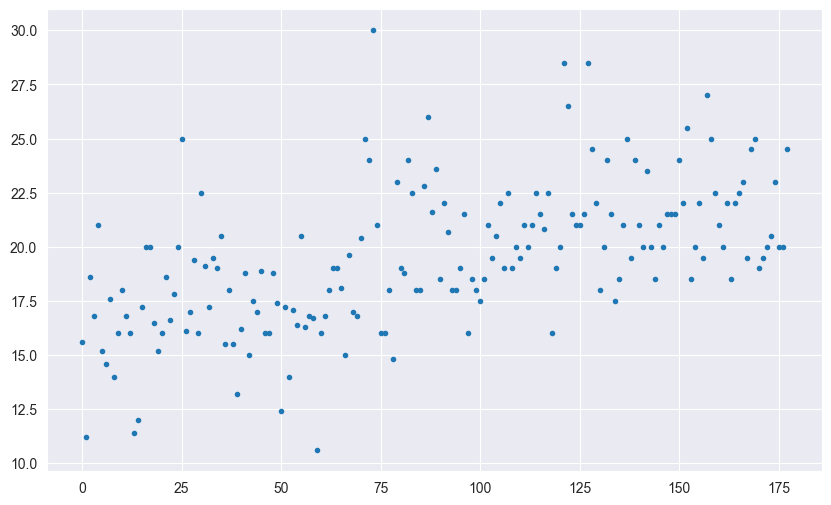

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x=range(len(data)), y=data['Alcalinity_of_ash'], label='Содержание щелочи', marker='.')

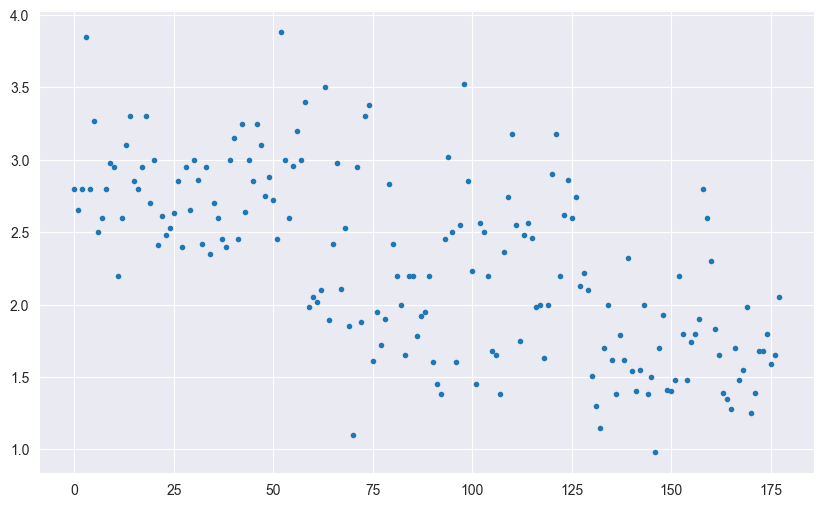

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x=range(len(data)), y=data['Total_phenols'], label='Содержание фенолов', marker='.')

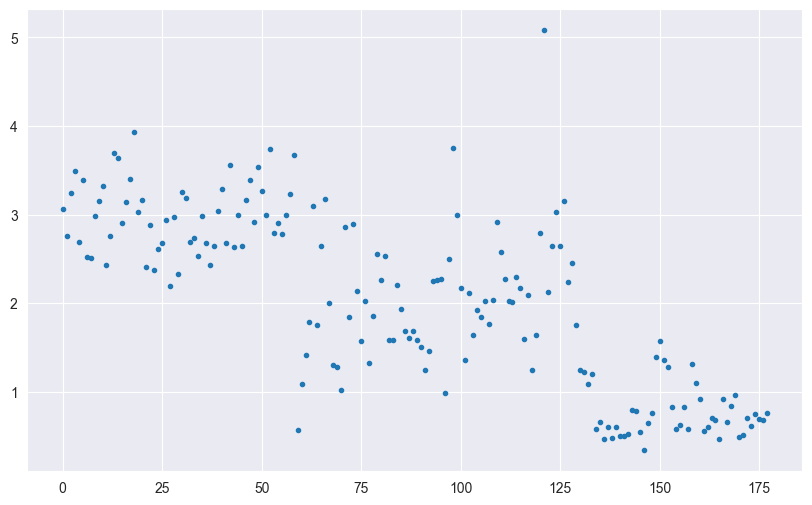

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x=range(len(data)), y=data['Flavanoids'], label='Содержание флавоноидов', marker='.')

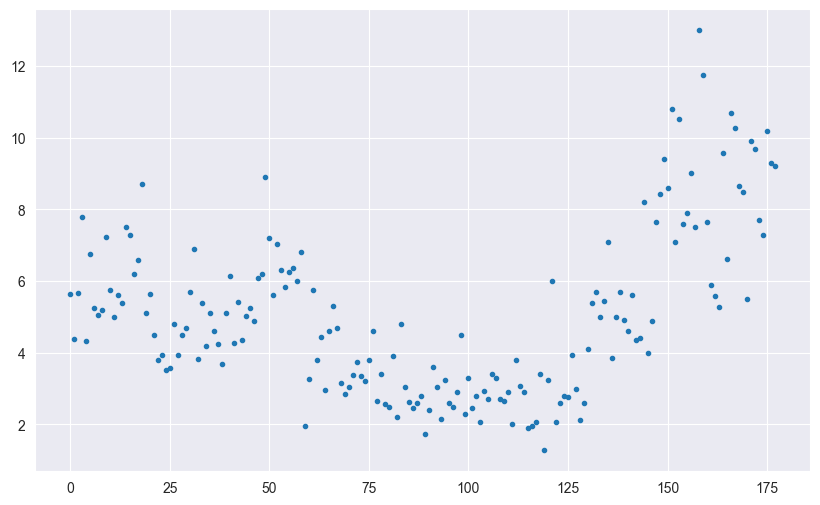

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x=range(len(data)), y=data['Color_intensity'], label='Содержание цветогово показателя', marker='.')

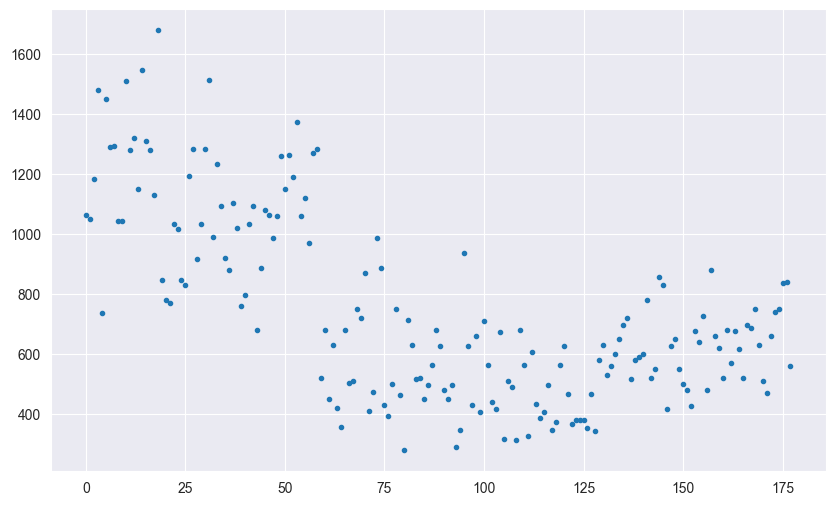

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x=range(len(data)), y=data['Proline'], label='Содержание пролина', marker='.')

In [ ]:
#Был построен скатерплот для первичной визуализации распространенности признаков. В целом мы видим, что наиболее отчетливо мы сможем классифицировать образцы вина по переменным: Proline;Color_intensity; Flavonoids;Alcholol;Malicacid. Постром цветовую гистограмму с разбиением по группами интересующих нас признаков.

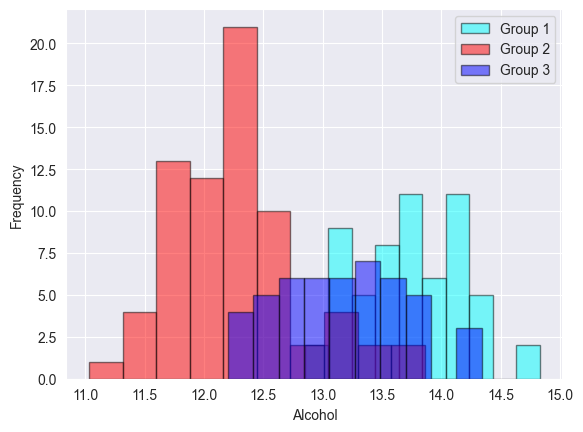

In [ ]:
# Выбираем данные для каждой группы классов? Под каждым X берутся данные соответствующие выбранному классу и переменной
x1 = data[data['class'] == 1]['Alcohol']
x2 = data[data['class'] == 2]['Alcohol']
x3 = data[data['class'] == 3]['Alcohol']

# Строим гистограмму для каждой группы классов с указанием цветов CMYK
plt.hist(x1, label='Group 1', alpha=0.5, color=(0, 1, 1, 0), edgecolor='black')  # циан
plt.hist(x2, label='Group 2', alpha=0.5, color=(1, 0, 0, 0), edgecolor='black')  # красный
plt.hist(x3, label='Group 3', alpha=0.5, color=(0, 0, 1, 0), edgecolor='black')  # желтый

# Добавляем подписи осей и легенду
plt.ylabel('Frequency')
plt.xlabel('Alcohol')
plt.legend()

# Отображаем гистограмму
plt.show()

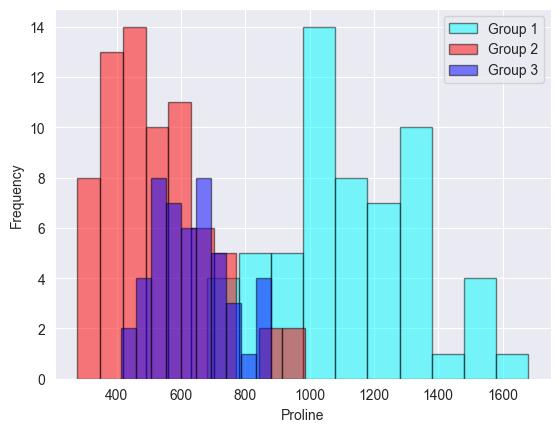

In [ ]:
# Выбираем данные для каждой группы классов? Под каждым X берутся данные соответствующие выбранному классу и переменной
x1 = data[data['class'] == 1]['Proline']
x2 = data[data['class'] == 2]['Proline']
x3 = data[data['class'] == 3]['Proline']

# Строим гистограмму для каждой группы классов с указанием цветов CMYK
plt.hist(x1, label='Group 1', alpha=0.5, color=(0, 1, 1, 0), edgecolor='black')  # циан
plt.hist(x2, label='Group 2', alpha=0.5, color=(1, 0, 0, 0), edgecolor='black')  # красный
plt.hist(x3, label='Group 3', alpha=0.5, color=(0, 0, 1, 0), edgecolor='black')  # желтый

# Добавляем подписи осей и легенду
plt.ylabel('Frequency')
plt.xlabel('Proline')
plt.legend()

# Отображаем гистограмму
plt.show()

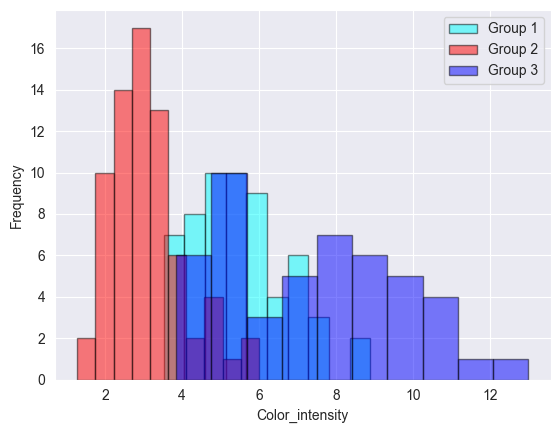

In [ ]:
# Выбираем данные для каждой группы классов? Под каждым X берутся данные соответствующие выбранному классу и переменной
x1 = data[data['class'] == 1]['Color_intensity']
x2 = data[data['class'] == 2]['Color_intensity']
x3 = data[data['class'] == 3]['Color_intensity']

# Строим гистограмму для каждой группы классов с указанием цветов CMYK
plt.hist(x1, label='Group 1', alpha=0.5, color=(0, 1, 1, 0), edgecolor='black')  # циан
plt.hist(x2, label='Group 2', alpha=0.5, color=(1, 0, 0, 0), edgecolor='black')  # красный
plt.hist(x3, label='Group 3', alpha=0.5, color=(0, 0, 1, 0), edgecolor='black')  # желтый

# Добавляем подписи осей и легенду
plt.ylabel('Frequency')
plt.xlabel('Color_intensity')
plt.legend()

# Отображаем гистограмму
plt.show()

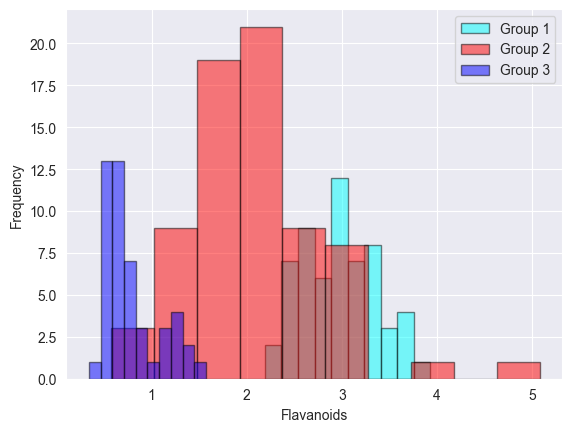

In [ ]:
# Выбираем данные для каждой группы классов? Под каждым X берутся данные соответствующие выбранному классу и переменной
x1 = data[data['class'] == 1]['Flavanoids']
x2 = data[data['class'] == 2]['Flavanoids']
x3 = data[data['class'] == 3]['Flavanoids']

# Строим гистограмму для каждой группы классов с указанием цветов CMYK
plt.hist(x1, label='Group 1', alpha=0.5, color=(0, 1, 1, 0), edgecolor='black')  # циан
plt.hist(x2, label='Group 2', alpha=0.5, color=(1, 0, 0, 0), edgecolor='black')  # красный
plt.hist(x3, label='Group 3', alpha=0.5, color=(0, 0, 1, 0), edgecolor='black')  # желтый

# Добавляем подписи осей и легенду
plt.ylabel('Frequency')
plt.xlabel('Flavanoids')
plt.legend()

# Отображаем гистограмму
plt.show()

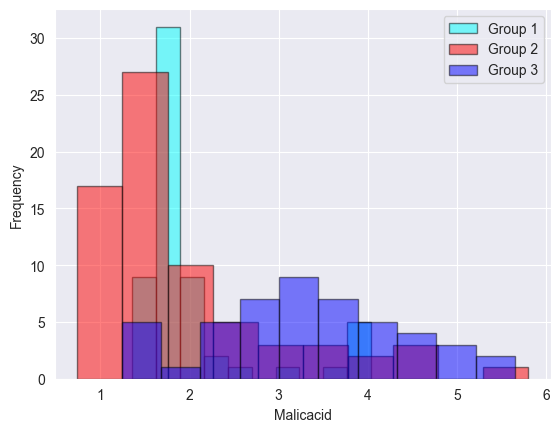

In [ ]:
# Выбираем данные для каждой группы классов? Под каждым X берутся данные соответствующие выбранному классу и переменной
x1 = data[data['class'] == 1]['Malicacid']
x2 = data[data['class'] == 2]['Malicacid']
x3 = data[data['class'] == 3]['Malicacid']

# Строим гистограмму для каждой группы классов с указанием цветов CMYK
plt.hist(x1, label='Group 1', alpha=0.5, color=(0, 1, 1, 0), edgecolor='black')  # циан
plt.hist(x2, label='Group 2', alpha=0.5, color=(1, 0, 0, 0), edgecolor='black')  # красный
plt.hist(x3, label='Group 3', alpha=0.5, color=(0, 0, 1, 0), edgecolor='black')  # желтый

# Добавляем подписи осей и легенду
plt.ylabel('Frequency')
plt.xlabel('Malicacid')
plt.legend()

# Отображаем гистограмму
plt.show()

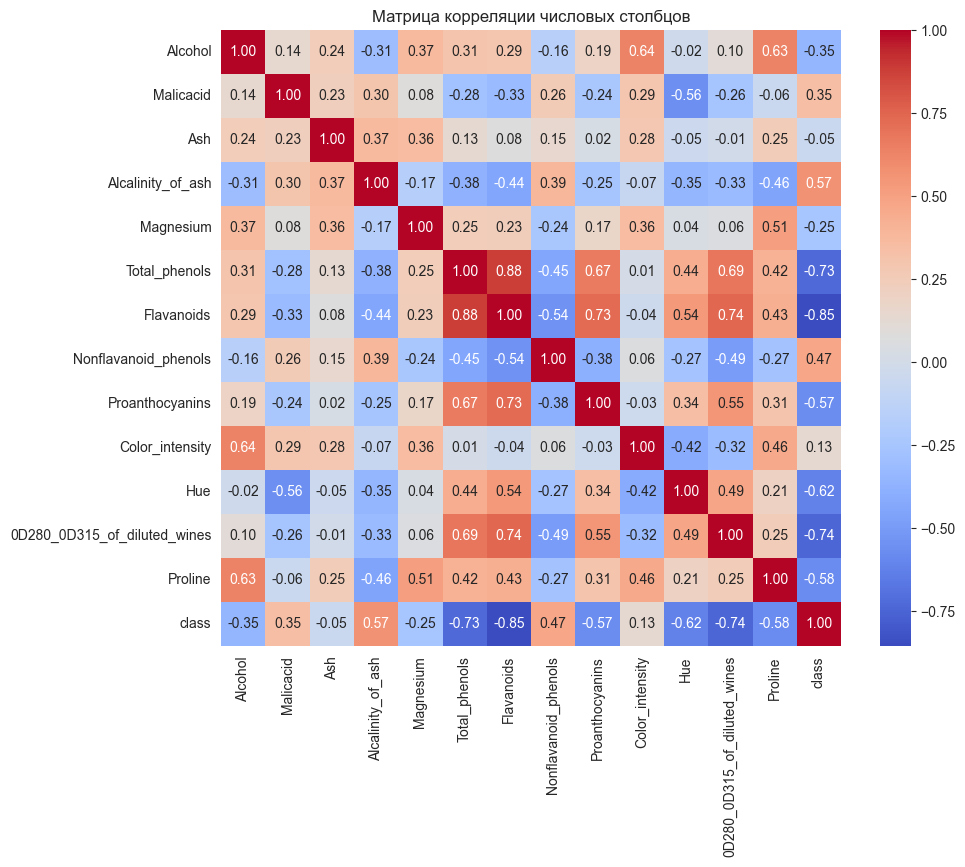

In [ ]:
#Строи тепловую карту корреляции
correlation_matrix = data.corr(method='spearman')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляции числовых столбцов')
plt.savefig('correlation_matrix.png')
plt.show()

In [ ]:
#Содержание флавоноидов и фенолов самые коррелируемые признаки, тогда как Ash и  0D280_0D315_of_diluted_wines самые некоррелирующие!/

In [ ]:
#Строим модель
X=data.drop(columns=['class'])
y=data['class']
# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# X_train - обучающий набор признаков
# X_test - тестовый набор признаков
# y_train - обучающий набор целевой переменной
# y_test - тестовый набор целевой переменной

In [ ]:
from sklearn import metrics
#Корреляционный классификатор
cclf=DecisionTreeClassifier(criterion='gini')
cclf.fit(X_train[['Flavanoids','Total_phenols']],y_train)
y_pred=cclf.predict(X_test[['Flavanoids','Total_phenols']])

In [ ]:
metrics.confusion_matrix(y_test, y_pred)

array([[14,  5,  0],
       [ 4, 15,  2],
       [ 0,  2, 12]], dtype=int64)

In [ ]:
report = metrics.classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.78      0.74      0.76        19
           2       0.68      0.71      0.70        21
           3       0.86      0.86      0.86        14

    accuracy                           0.76        54
   macro avg       0.77      0.77      0.77        54
weighted avg       0.76      0.76      0.76        54



In [ ]:
#Некорреляционный классификатор
ncclf=DecisionTreeClassifier(criterion='gini')
cclf.fit(X_train[['0D280_0D315_of_diluted_wines','Ash']],y_train)
y_pred=cclf.predict(X_test[['0D280_0D315_of_diluted_wines','Ash']])

In [ ]:
metrics.confusion_matrix(y_test, y_pred)

array([[10,  9,  0],
       [ 4, 15,  2],
       [ 0,  4, 10]], dtype=int64)

In [ ]:
report1 = metrics.classification_report(y_test, y_pred)
print(report1)

              precision    recall  f1-score   support

           1       0.71      0.53      0.61        19
           2       0.54      0.71      0.61        21
           3       0.83      0.71      0.77        14

    accuracy                           0.65        54
   macro avg       0.69      0.65      0.66        54
weighted avg       0.68      0.65      0.65        54



In [ ]:
# В целом мы можем сказать, что модель построенная на коррелирующих признаках работает чуть лучше чем некоррелирующая, рассматривая значения метрических данных.

In [ ]:
#Рандомный лес
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

In [ ]:
metrics.confusion_matrix(y_test, y_pred)


array([[19,  0,  0],
       [ 0, 21,  0],
       [ 0,  0, 14]], dtype=int64)

In [ ]:
report2 = metrics.classification_report(y_test, y_pred)
print(report2)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [ ]:
# По полученным данным - МОДЕЛЬ ИДЕАЛЬНА!

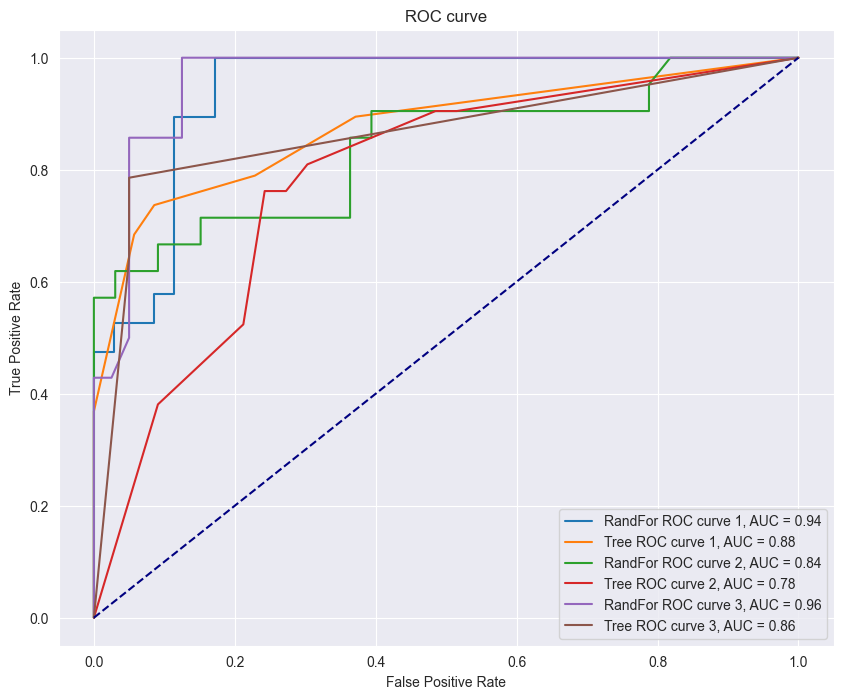

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Создание и обучение DecisionTreeClassifier
clfTree = DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_split=0.1)
clfTree.fit(X_train[['0D280_0D315_of_diluted_wines', 'Ash']], y_train)

# Создание и обучение RandomForestClassifier
clfRandomForest = RandomForestClassifier(criterion='gini', max_depth=6, min_samples_split=0.1)
clfRandomForest.fit(X_train[['0D280_0D315_of_diluted_wines', 'Ash']], y_train)

# Создание и настройка графика
plt.figure(figsize=(10, 8))

# Построение ROC-кривых и вычисление AUC для каждого класса
for i in range(3):
    # ROC-кривая и AUC для RandomForestClassifier
    y_proba_rf = clfRandomForest.predict_proba(X_test[['0D280_0D315_of_diluted_wines', 'Ash']])[:, i]
    fpr_rf, tpr_rf, _ = roc_curve(y_test == i+1, y_proba_rf)
    auc_rf = roc_auc_score(y_test == i+1, y_proba_rf)
    plt.plot(fpr_rf, tpr_rf, label=f'RandFor ROC curve {i+1}, AUC = {auc_rf:.2f}')

    # ROC-кривая и AUC для DecisionTreeClassifier
    y_proba_tree = clfTree.predict_proba(X_test[['0D280_0D315_of_diluted_wines', 'Ash']])[:, i]
    fpr_tree, tpr_tree, _ = roc_curve(y_test == i+1, y_proba_tree)
    auc_tree = roc_auc_score(y_test == i+1, y_proba_tree)
    plt.plot(fpr_tree, tpr_tree, label=f'Tree ROC curve {i+1}, AUC = {auc_tree:.2f}')

# Добавление линии случайного угадывания
plt.plot([0, 1], [0, 1], linestyle='--', color='navy')

# Настройка отображения
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend()
plt.grid(True)

plt.show()


In [ ]:
#В целом, RandomForestClassifier показал более высокую производительность по сравнению с DecisionTreeClassifier для всех трех классов на данном наборе данных.